In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Membaca dataset
df = pd.read_csv('data1.csv')

# Membersihkan nama kolom dari spasi
df.columns = df.columns.str.strip()

# Tampilkan kolom
print("Kolom yang tersedia di dataset:")
print(df.columns.tolist())

# Melihat struktur data
print("\nShape of the dataset:", df.shape)
print("\nInfo about the dataset:")
print(df.info())

# Melihat data sekilas
print("\nFirst few rows of the dataset:")
print(df.head())

# Ringkasan statistik
print("\nStatistical summary of the dataset:")
print(df.describe())

# ====================
# Visualisasi Data
# ====================

# Visualisasi distribusi Age
if 'Age' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'], bins=30, kde=True)
    plt.title('Distribusi Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Kolom 'Age' tidak ditemukan!")

# Visualisasi hubungan Age dan Income
if 'Age' in df.columns and 'Income' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='Income', data=df)
    plt.title('Hubungan Age dan Income')
    plt.xlabel('Age')
    plt.ylabel('Income')
    plt.show()
else:
    print("Kolom 'Age' atau 'Income' tidak ditemukan!")

# Visualisasi distribusi Gender
if 'Gender' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Gender', data=df)
    plt.title('Distribusi Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()
else:
    print("Kolom 'Gender' tidak ditemukan!")

# ====================
# Analisis Statistik
# ====================

# Korelasi hanya antar kolom numerik
print("\nCorrelation matrix:")
print(df.select_dtypes(include=[np.number]).corr())

# Cek missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Imputasi nilai kosong di Age dengan mean
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].mean())

# Boxplot untuk melihat outlier di Age
if 'Age' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Age'])
    plt.title('Boxplot Age')
    plt.xlabel('Age')
    plt.show()

# ====================
# Preprocessing Data
# ====================

# Normalisasi kolom numerik
cols_to_scale = ['Age', 'Income']
for col in cols_to_scale:
    if col in df.columns:
        df[col] = StandardScaler().fit_transform(df[[col]])

# Fitur baru: rasio Age terhadap Income
if 'Age' in df.columns and 'Income' in df.columns:
    df['Age_Income_Ratio'] = df['Age'] / (df['Income'] + 1e-9)  # Tambah epsilon untuk hindari pembagian 0

# Data setelah preprocessing
print("\nFirst few rows after preprocessing:")
print(df.head())


Kolom yang tersedia di dataset:
['Index;Age;Income;Gender']

Shape of the dataset: (9, 1)

Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Index;Age;Income;Gender  9 non-null      object
dtypes: object(1)
memory usage: 204.0+ bytes
None

First few rows of the dataset:
  Index;Age;Income;Gender
0         0;25;50000;Male
1       1;30;60000;Female
2         2;35;70000;Male
3         3;20;45000;Male
4         4;35;30000;Male

Statistical summary of the dataset:
       Index;Age;Income;Gender
count                        9
unique                       9
top            0;25;50000;Male
freq                         1
Kolom 'Age' tidak ditemukan!
Kolom 'Age' atau 'Income' tidak ditemukan!
Kolom 'Gender' tidak ditemukan!

Correlation matrix:
Empty DataFrame
Columns: []
Index: []

Missing values in each column:
I

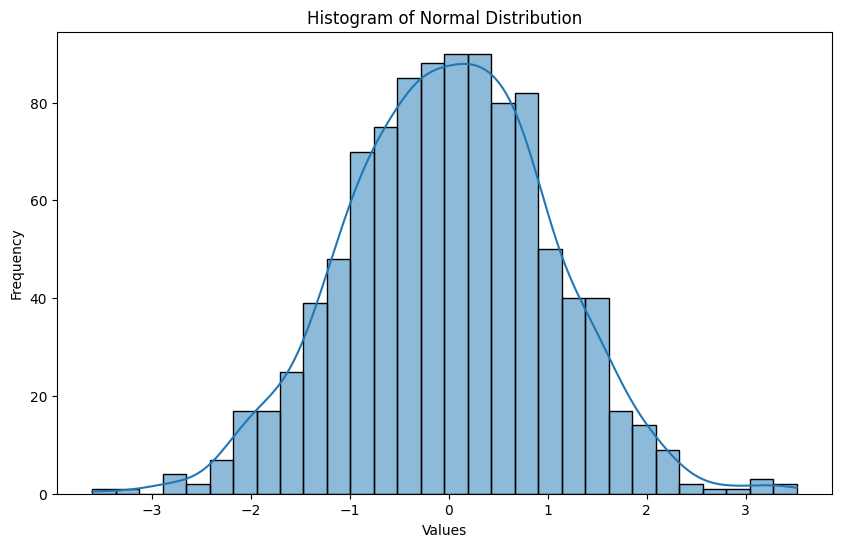

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Generate data from a normal distribution
data_normal = np.random.normal(loc=0, scale=1, size=1000)
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_normal, bins=30, kde=True)
plt.title('Histogram of Normal Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

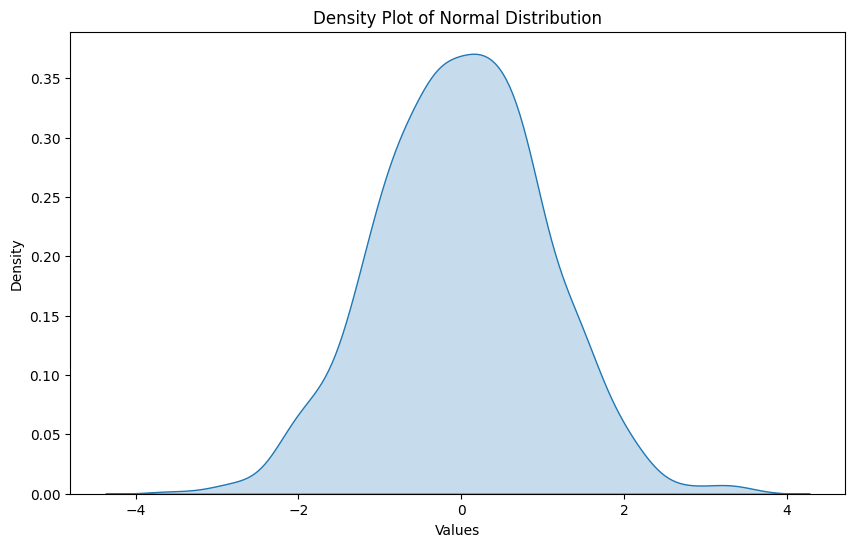

In [ ]:
# Plot density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data_normal, fill=True)
plt.title('Density Plot of Normal Distribution')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

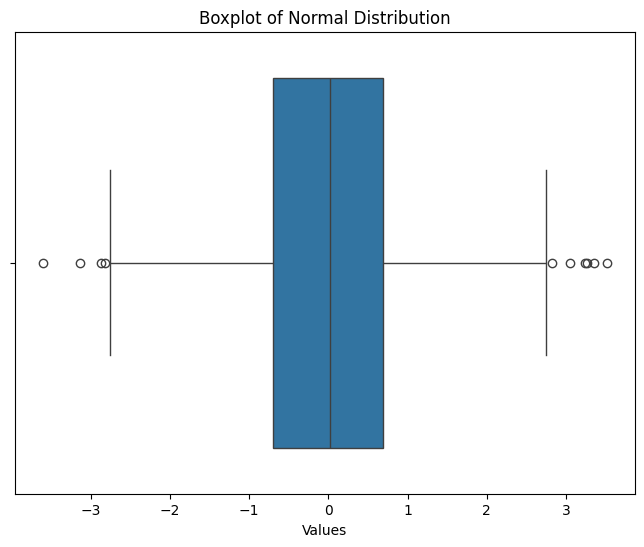

In [ ]:
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_normal)
plt.title('Boxplot of Normal Distribution')
plt.xlabel('Values')
plt.show()

    Age  Income
0    25   50000
1    30   80000
2    35   60000
3    40   70000
4   100  200000
5    45   75000
6    50   80000
7    25   50000
8    30   80000
9    35   60000
10   40   70000
11   45   75000
12   50   80000
13  150  300000


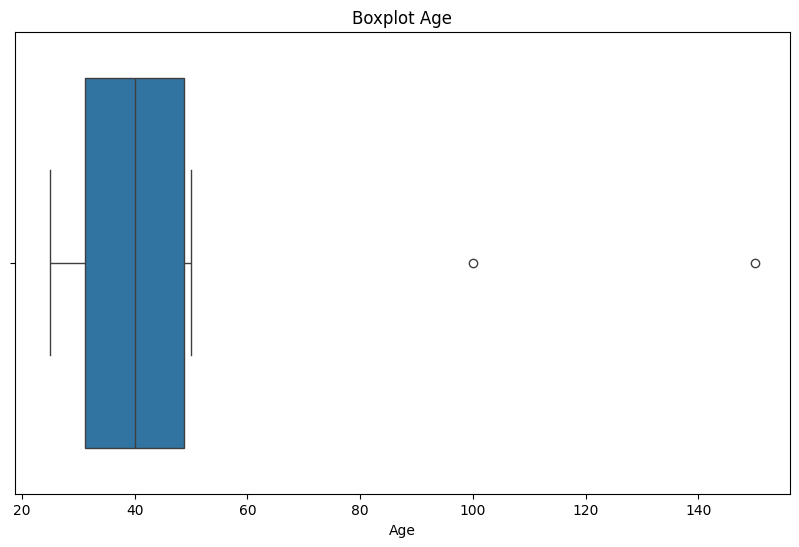

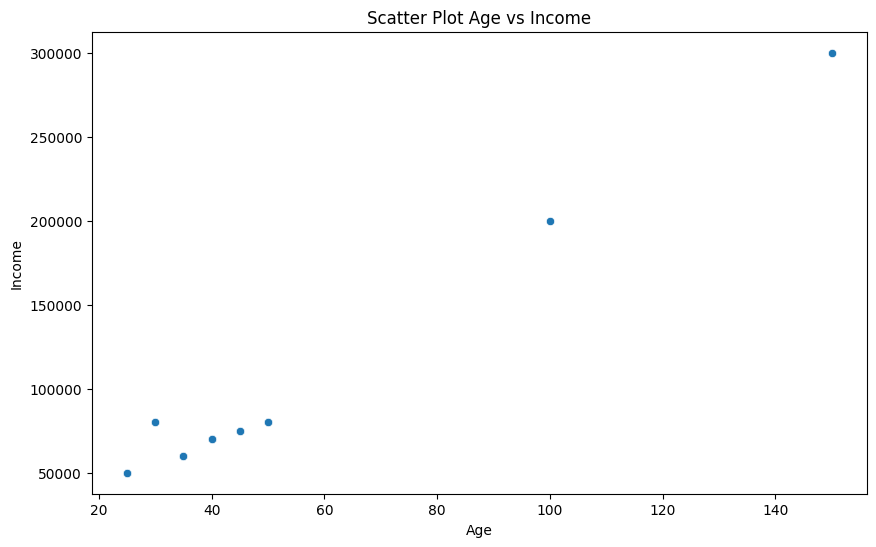


Outliers berdasarkan IQR:
    Age  Income
4   100  200000
13  150  300000

Outliers berdasarkan Z-Score:
    Age  Income
13  150  300000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Membuat data sampel
data = {
'Age': [25, 30, 35, 40, 100, 45, 50, 25, 30, 35, 40, 45, 50, 150],
'Income': [50000, 80000, 60000, 70000, 200000, 75000, 80000, 50000, 80000,
60000, 70000, 75000, 80000, 300000]
}
# Membuat dataframe
df = pd.DataFrame(data)
# Menampilkan data
print(df)
# Visualisasi Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot Age')
plt.xlabel('Age')
plt.show()
# Visualisasi Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Scatter Plot Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()
# Identifikasi Outliers dengan IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers_IQR = df[(df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))]
print("\nOutliers berdasarkan IQR:")
print(outliers_IQR)
# Identifikasi Outliers dengan Z-Score
from scipy import stats
z_scores = np.abs(stats.zscore(df['Age']))
outliers_z = df[(z_scores > 3)]
print("\nOutliers berdasarkan Z-Score:")
print(outliers_z)

In [ ]:
import pandas as pd
import numpy as np
# Membuat data sampel dengan missing values
data = {
'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
'Age': [25, np.nan, 35, 45, np.nan],
'Income': [50000, 60000, np.nan, 80000, 90000],
'Gender': ['F', 'M', np.nan, 'M', 'F']
}
# Membuat dataframe
df = pd.DataFrame(data)
# Menampilkan data
print("Original DataFrame:")
print(df)
# Menghapus baris dengan missing values
df_dropna = df.dropna()
print("\nDataFrame setelah menghapus baris dengan missing values:")
print(df_dropna)
# Mengisi missing values dengan mean (untuk kolom numerik)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Income'].fillna(df['Income'].mean(), inplace=True)
print("\nDataFrame setelah mengisi missing values dengan mean:")
print(df)
# Mengisi missing values dengan mode (untuk kolom kategorikal)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
print("\nDataFrame setelah mengisi missing values dengan mode:")
print(df)
# Mengisi missing values dengan metode forward fill
df_ffill = df.fillna(method='ffill')
print("\nDataFrame setelah mengisi missing values dengan forward fill:")
print(df_ffill)
# Mengisi missing values dengan metode backward fill
df_bfill = df.fillna(method='bfill')
print("\nDataFrame setelah mengisi missing values dengan backward fill:")
print(df_bfill)
# Mengisi missing values dengan interpolasi
df_interpolate = df.interpolate(method='linear')
print("\nDataFrame setelah mengisi missing values dengan interpolasi:")
print(df_interpolate)

Original DataFrame:
      Name   Age   Income Gender
0    Alice  25.0  50000.0      F
1      Bob   NaN  60000.0      M
2  Charlie  35.0      NaN    NaN
3    David  45.0  80000.0      M
4      Eve   NaN  90000.0      F

DataFrame setelah menghapus baris dengan missing values:
    Name   Age   Income Gender
0  Alice  25.0  50000.0      F
3  David  45.0  80000.0      M

DataFrame setelah mengisi missing values dengan mean:
      Name   Age   Income Gender
0    Alice  25.0  50000.0      F
1      Bob  35.0  60000.0      M
2  Charlie  35.0  70000.0    NaN
3    David  45.0  80000.0      M
4      Eve  35.0  90000.0      F

DataFrame setelah mengisi missing values dengan mode:
      Name   Age   Income Gender
0    Alice  25.0  50000.0      F
1      Bob  35.0  60000.0      M
2  Charlie  35.0  70000.0      F
3    David  45.0  80000.0      M
4      Eve  35.0  90000.0      F

DataFrame setelah mengisi missing values dengan forward fill:
      Name   Age   Income Gender
0    Alice  25.0  50000.0    

C:\Users\asus\AppData\Local\Temp\ipykernel_15332\3911562302.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_15332\3911562302.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Original DataFrame:
   Age  Income  Gender Purchased
0   25   50000    Male        No
1   30   80000  Female       Yes
2   35   60000    Male        No
3   40   70000  Female       Yes
4  100  200000  Female       Yes

Statistical summary of the dataset:
              Age         Income
count   14.000000      14.000000
mean    50.000000   95000.000000
std     34.250211   69337.524528
min     25.000000   50000.000000
25%     31.250000   62500.000000
50%     40.000000   75000.000000
75%     48.750000   80000.000000
max    150.000000  300000.000000


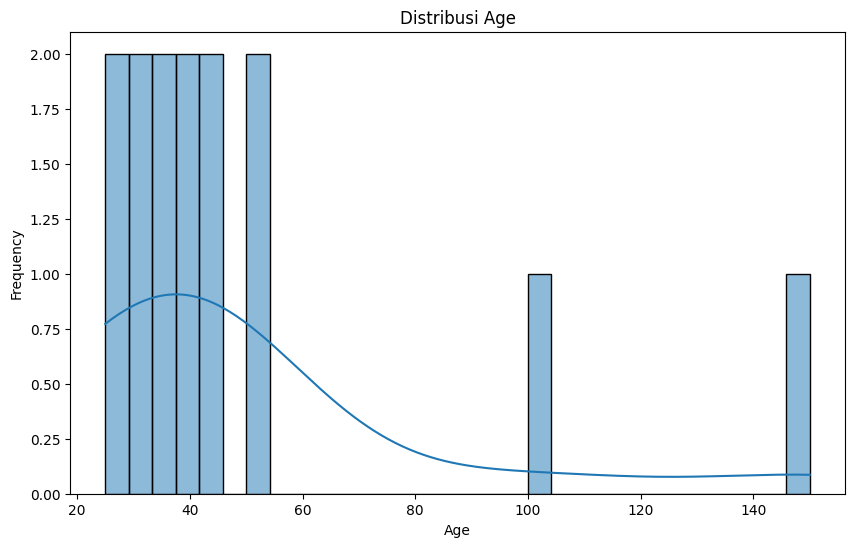

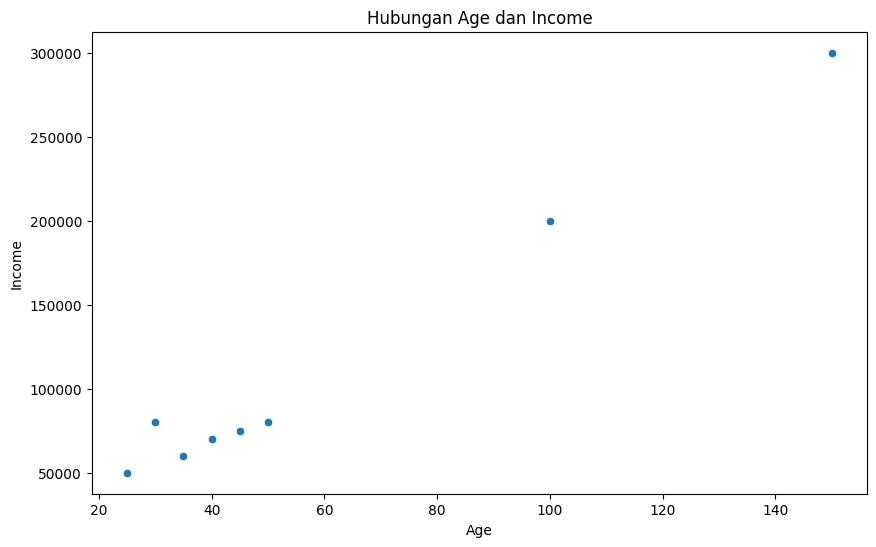

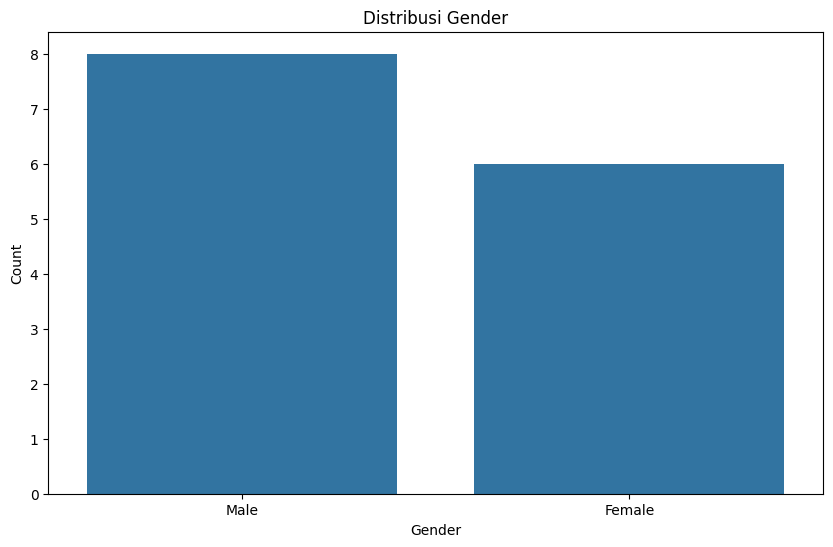


Model Performance:
Accuracy: 0.6666666666666666
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666
Confusion Matrix:
[[1 1]
 [0 1]]


C:\Users\asus\AppData\Local\Temp\ipykernel_15332\1714762551.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_15332\1714762551.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Membuat data sampel
data = {
    'Age': [25, 30, 35, 40, 100, 45, 50, 25, 30, 35, 40, 45, 50, 150],
    'Income': [50000, 80000, 60000, 70000, 200000, 75000, 80000, 50000, 80000,
               60000, 70000, 75000, 80000, 300000],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male',
               'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male'],
    'Purchased': ['No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
                  'No', 'Yes', 'No', 'Yes', 'No']
}

# Membuat dataframe
df = pd.DataFrame(data)

# Menampilkan data sekilas
print("Original DataFrame:")
print(df.head())

# Eksplorasi Data
print("\nStatistical summary of the dataset:")
print(df.describe())

# Visualisasi Data
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribusi Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Hubungan Age dan Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Menangani Missing Values dan Outliers
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Income'].fillna(df['Income'].mean(), inplace=True)

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

# Transformasi Data
X = df[['Age', 'Income', 'Gender']]
y = df['Purchased']

# Mengubah Data Kategorikal ke Numerik
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Gender'])], remainder='passthrough')
X = ct.fit_transform(X)

# Normalisasi Data
sc = StandardScaler()
X = sc.fit_transform(X)

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training Model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Prediksi
y_pred = classifier.predict(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
cm = confusion_matrix(y_test, y_pred)

# Menampilkan hasil evaluasi model
print("\nModel Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Membuat data sampel
X_train = np.random.rand(1000, 20)  # 1000 sampel, 20 fitur
y_train = np.random.randint(2, size=(1000, 1))  # 1000 label biner (0 atau 1)
X_val = np.random.rand(200, 20)  # 200 sampel validasi
y_val = np.random.randint(2, size=(200, 1))  # 200 label validasi biner (0 atau 1)

# Membangun model sederhana
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=20))  # Lapisan input dengan 64 neuron dan ReLU
model.add(Dense(64, activation='relu'))  # Lapisan tersembunyi dengan 64 neuron dan ReLU
model.add(Dense(1, activation='sigmoid'))  # Lapisan output (1 neuron dengan sigmoid untuk klasifikasi biner)

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Menggunakan early stopping untuk mencegah overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Menampilkan ringkasan model
print(model.summary())

# (Opsional) Menampilkan plot untuk memvisualisasikan sejarah pelatihan
import matplotlib.pyplot as plt

# Plot akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot kerugian pelatihan dan validasi
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'numpy'

In [12]:
# Contoh Implementasi dengan Scikit-learn
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Membuat data sampel
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
n_redundant=5, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
random_state=42)
# Membangun model dengan early stopping
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01,
validation_fraction=0.2, n_iter_no_change=10)
# Melatih model
model.fit(X_train, y_train)
# Prediksi dan evaluasi
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.8850


In [13]:
# Regularisasi dengan L2 (Ridge Regression) di Scikit-learn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# Membuat data sampel
X = np.random.rand(100, 5)
y = 3*X[:, 0] + 2*X[:, 1] + np.random.randn(100) * 0.1
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Melatih model dengan Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
# Prediksi dan evaluasi
y_pred_train = ridge_reg.predict(X_train)
y_pred_test = ridge_reg.predict(X_test)
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))

Train MSE: 0.028683601543049008
Test MSE: 0.028948037138606848


In [14]:
# Early Stopping dengan Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
# Membuat data sampel
X_train = np.random.rand(1000, 20)
y_train = np.random.randint(2, size=(1000, 1))
X_val = np.random.rand(200, 20)
y_val = np.random.randint(2, size=(200, 1))
# Membangun model sederhana
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
# Menggunakan early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5,
restore_best_weights=True)
# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
validation_data=(X_val, y_val), callbacks=[early_stopping])
# Menampilkan ringkasan model
print(model.summary())

ImportError: Traceback (most recent call last):
  File "C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [15]:
# Droout dengan Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Membuat data sampel
X_train = np.random.rand(1000, 20)
y_train = np.random.randint(2, size=(1000, 1))
X_val = np.random.rand(200, 20)
y_val = np.random.randint(2, size=(200, 1))
# Membangun model dengan Dropout
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
validation_data=(X_val, y_val))
# Menampilkan ringkasan model
print(model.summary())

ImportError: Traceback (most recent call last):
  File "C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.